### 🔹 Decision Tree Regression  

Decision Tree Regression is a non-linear regression technique that uses a **tree-like structure** to make predictions.  
Instead of fitting a single line or curve, the model splits the dataset into smaller regions and fits a **constant value** in each region.  

The main idea:  
- The algorithm splits the data into branches based on feature values.  
- Each split aims to minimize prediction error (commonly using Mean Squared Error).  
- The final prediction for a region is the **average of target values** in that region.  

The mathematical model is not expressed as a single equation but as a **set of rules** learned from the data:  
- Example:  
  - If \(X1 < 5.3\) → predict 10  
  - Else if \(X2 > 7.1\) → predict 15  
  - Else → predict 12  

Decision Tree Regression helps us to:  
- Capture **non-linear and complex relationships**.  
- Provide **interpretable models** through visual tree structures.  
- Serve as the foundation for more advanced ensemble methods (Random Forest, Gradient Boosting, etc.).  

In this notebook, we will implement **Decision Tree Regression** and explore how tree depth and splitting criteria affect model performance 🚀.  


# --------------------------------------------------------------------------

# import dataset

In [1]:
# from google.colab import files, drive

# up = files.upload()
# drive.mount('/content/drive')

In [2]:
import pandas as pd

df = pd.read_csv('dataset.csv')
df.head(3)

,A,B,C,T
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136


In [3]:
df = df[['A', 'T']]
df.head(3)

,A,T
0,2.0,196
1,2.4,221
2,1.5,136


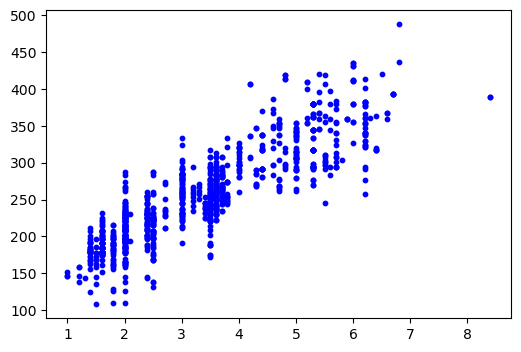

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(df[['A']], df['T'], s=10, c='b')
plt.show()

# cleaning

In [5]:
# clean the data

# encoding

In [6]:
# encode the data

# define x , y

In [7]:
import numpy as np

x = df[['A']].values   # 2D
y = df['T'].values     # 1D

# spliting

In [8]:
# # finding best random state 

# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeRegressor
# dtr = DecisionTreeRegressor()
# from sklearn.metrics import r2_score

# import time
# t1 = time.time()
# lst = []
# for i in range(1,10):
#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
#     dtr.fit(x,y)
#     yhat_test = dtr.predict(x_test)
#     r2 = r2_score(y_test, yhat_test)
#     lst.append(r2)
# t2 = time.time()

# print(f"run time: {round((t2 - t1)/60, 2)} min")
# print(f"r2_score: {round(max(lst), 2)}")
# rs = np.argmax(lst) + 1
# print(f"random_state: {rs}")

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [10]:
y_train[:5]

array([258, 212, 317, 308, 301])

# scaling

In [11]:
# No need for scaling in Decision Tree Regression

# train the model

In [12]:
# # K-fold cross validation

# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import GridSearchCV

# parameters = {
#     '': [],
#     '': []
# }

# dt = DecisionTreeRegressor(random_state=1)
# gs = GridSearchCV(estimator=dt, param_grid=parameters, cv=5)

# gs.fit(x_train, y_train)

# best_params = gs.best_params_
# print(best_params)

In [13]:
# def param
# criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
# min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
# min_impurity_decrease=0.0, ccp_alpha=0.0, monotonic_cst=None

In [14]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

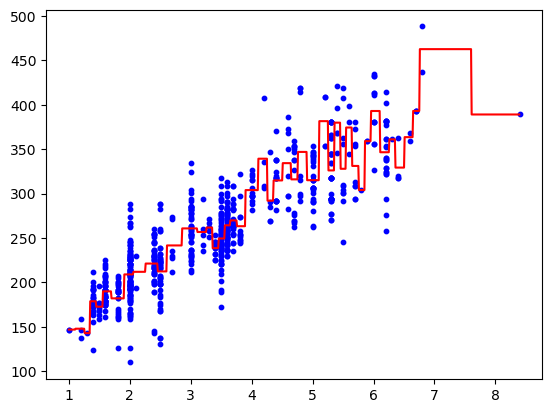

In [15]:
plt.scatter(x_train, y_train, color='b', s=10)
xx = np.arange(np.min(x_train), np.max(x_train), 0.01).reshape(-1, 1)
plt.plot(xx, dtr.predict(xx), color='r')
plt.show()

# predict test data

In [16]:
yhat_test = dtr.predict(x_test)

# evaluate the model

In [17]:
from sklearn.metrics import r2_score

print("r2-score (train data): %0.4f" % r2_score(y_train, dtr.predict(x_train)))
print("r2-score (test data): %0.4f" % r2_score(y_test, yhat_test))

r2-score (train data): 0.8176
r2-score (test data): 0.8075


In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(f"MSE (train data): {mean_squared_error(y_train, dtr.predict(x_train))}")
print(f"RMSE (train data): {np.sqrt(mean_squared_error(y_train, dtr.predict(x_train)))}")
print(f"MAE (train data): {mean_absolute_error(y_train, dtr.predict(x_train))}")
print('------------')
print(f"MSE (test data): {mean_squared_error(y_test, yhat_test)}")
print(f"RMSE (test data): {np.sqrt(mean_squared_error(y_test, yhat_test))}")
print(f"MAE (test data): {mean_absolute_error(y_test, yhat_test)}")

MSE (train data): 723.4422132010718
RMSE (train data): 26.896881105456664
MAE (train data): 20.533924544900202
------------
MSE (test data): 798.4732305024548
RMSE (test data): 28.257268631317764
MAE (test data): 20.992326840780198


# predict new data

In [19]:
dtr.predict([[5.5]])

array([327.90909091])

# save the model

In [20]:
# import joblib

# joblib.dump(dtr, 'dtr_model.pkl')

# load the model

In [21]:
# import joblib

# dtr = joblib.load('dtr_model.pkl')